In [3]:
import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder

import re

import nltk

from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords

In [ ]:
# IMPORT TRAINING DATASET

train_data = pd.read_csv("/kaggle/input/medical-data/train_data_chatbot.csv")

train_data.head()

In [ ]:
# IMPORT TESTING DATASET

test_data = pd.read_csv("/kaggle/input/medical-data/validation_data_chatbot.csv")

test_data.head()

In [ ]:
# CONCATENATE THE DATASETS

df = pd.concat([train_data, test_data], ignore_index = True)

df.to_csv("Medical_data.csv",index=False)

df.head()

In [ ]:
# DECLARE DEPENDENT AND INDEPENDENT VARIABLES AND FIND THEIR SIZE

X = df["short_question"]

Y = df["short_answer"]

print("Shape of X",X.shape)

print("Shape of Y",Y.shape)

In [ ]:
# CHECK FOR MISSING VALUES IN THE DATASET

print("\nMissing values in the dataset:")

print(df.isnull().sum())

In [ ]:
# REMOVING NOISE

def remove_noise(text):

    text = re.sub(r'<.*?>', '', str(text)) # Removes Hyperlinks

    text = re.sub(r'[^\w\s.]', '', text)   # Removes non-alphanumeric characters except spaces and fullstops

    text = re.sub(r'[\x00-\x1F]+', '', str(text))  # Removes ASCII control characters (0-31)

    return text

df['cleaned_short_question'] = df['short_question'].apply(remove_noise)

df['cleaned_short_answer'] = df['short_answer'].apply(remove_noise)

# df_cleaned = df.applymap(remove_noise)

# df_cleaned.head()

df.head()

In [ ]:
nltk.download('stopwords')

In [ ]:
# REMOVE STOPWORDS EXCEPT THE WORDS THAT ARE NEEDED

stop_words = set(stopwords.words('english'))

# negative_words = {"not", "no", "never", "n't", "neither", "nor", "wasn't", "weren't", "haven't", "hadn't", "don't", "doesn't", "didn't", "won't", "wouldn't", "shouldn't", "couldn't", "can't","mustn't","shan't","mightn't","doesn'","haven","mustn","shouldn","couldn","mightn","won","didn","isn","aren't","isn't","wasn","wouldn","hasn't","hadn","needn't","weren"}

negative_words = {"not", "no", "never", "n't", "neither", "nor", "wasn't", "weren't", "haven't", "hadn't", "don't", "doesn't", "didn't", "won't", "wouldn't", "shouldn't", "couldn't", "can't","mustn't","shan't","mightn't","aren't","isn't","hasn't","needn't"}

# s = [word for word in stop_words if word not in negative_words]

# print(s)



def remove_stopwords(text):

    words = text.split()  # Split text into words

    filtered_words = [word for word in words if word.lower() not in stop_words or word.lower() in negative_words]  # Remove stopwords

    return ' '.join(filtered_words)  # Join filtered words back into a string



# Apply stopword removal to all columns

# stdf = df.applymap(remove_stopwords)

# stdf.head()



df['c_short_question_no_stopwords'] = df['cleaned_short_question'].apply(remove_stopwords)

df['c_short_answer_no_stopwords'] = df['cleaned_short_answer'].apply(remove_stopwords)

df.head()

In [ ]:
nltk.download('punkt')

In [ ]:
# WORD TOKENIZATION

def tokenize_text(text):

    tokens = word_tokenize(str(text))

    return tokens

# for col in df.columns:

#   if col!='tags' and col!='label':

#     df[col + '_tokens'] = df[col].apply(tokenize_text)

df['cleaned_short_question_no_SW_tokens'] = df['c_short_question_no_stopwords'].apply(tokenize_text)

df['cleaned_short_answer_no_SW_tokens'] = df['c_short_answer_no_stopwords'].apply(tokenize_text)

df.to_csv("tokenized_data.csv", index=False)

In [ ]:
# READING THE TOKENIZED DATASET

data = pd.read_csv("/kaggle/input/data-after-tokenization/tokenized_data.csv")

#data = data.drop(columns=['short_question_tokens_tokens', 'short_answer_tokens_tokens', 'tags_tokens_tokens', 'label_tokens_tokens'])

data.head()

In [ ]:
# CONVERT TO LOWERCASE

def lowercase_text(text):

    return str(text).lower()

df = data.applymap(lowercase_text)

df.head()

In [ ]:
# LEMMATIZING THE DATASET AND CALCULATING THE TIME TAKEN FOR THAT
import spacy
import pandas as pd
import time
spacy.require_gpu()

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to lemmatize texts in batches
def lemmatize_texts(texts, batch_size=1000):
    lemmatized_tokens = []
    for doc in nlp.pipe(texts, batch_size=batch_size):
        lemmatized_tokens.append([token.lemma_ for token in doc])
    return lemmatized_tokens

# Measure the start time
start_time = time.time()

# Lemmatize the whole dataset columns
df['lemmatized_short_question_tokens'] = lemmatize_texts(df['cleaned_short_question_no_SW_tokens'].tolist())
df['lemmatized_short_answer_tokens'] = lemmatize_texts(df['cleaned_short_answer_no_SW_tokens'].tolist())

# Measure the end time
end_time = time.time()

# Print the time taken
print(f"Time taken to lemmatize the whole dataset: {(end_time - start_time)/60:.2f} minutes")

# Save the lemmatized dataframe to a file (optional)
df.to_csv("lemmatized_dataset.csv", index=False)


In [ ]:
df = pd.read_csv("/kaggle/input/lemmatized-data/lemmatized_dataset.csv")
df.head()

,short_question,short_answer,tags,label,cleaned_short_question,cleaned_short_answer,c_short_question_no_stopwords,c_short_answer_no_stopwords,cleaned_short_question_no_SW_tokens,cleaned_short_answer_no_SW_tokens,lemmatized_short_question_tokens,lemmatized_short_answer_tokens
0,can an antibiotic through an iv give you a ras...,yes it can even after you have finished the pr...,['rash' 'antibiotic'],1.0,can an antibiotic through an iv give you a ras...,yes it can even after you have finished the pr...,antibiotic iv give rash couple days later,yes even finished prescription antibiotics,"['antibiotic', 'iv', 'give', 'rash', 'couple',...","['yes', 'even', 'finished', 'prescription', 'a...","['[', ""'"", 'antibiotic', ""'"", ',', ""'"", 'iv', ...","['[', ""'"", 'yes', ""'"", ',', ""'"", 'even', ""'"", ..."
1,can you test positive from having the hep b va...,test positive for what if you had a hep b vacc...,['hepatitis b'],1.0,can you test positive from having the hep b va...,test positive for what if you had a hep b vacc...,test positive hep b vaccine,test positive hep b vaccine subsequent blood t...,"['test', 'positive', 'hep', 'b', 'vaccine']","['test', 'positive', 'hep', 'b', 'vaccine', 's...","['[', ""'"", 'test', ""'"", ',', ""'"", 'positive', ...","['[', ""'"", 'test', ""'"", ',', ""'"", 'positive', ..."
2,what are the dietary restrictions for celiac d...,omitting gluten from the diet is the key to co...,['celiac disease'],1.0,what are the dietary restrictions for celiac d...,omitting gluten from the diet is the key to co...,dietary restrictions celiac disease gluten,omitting gluten diet key controlling celiac di...,"['dietary', 'restrictions', 'celiac', 'disease...","['omitting', 'gluten', 'diet', 'key', 'control...","['[', ""'"", 'dietary', ""'"", ',', ""'"", 'restrict...","['[', ""'"", 'omit', ""'"", ',', ""'"", 'gluten', ""'..."
3,can i transmit genital warts seventeen years a...,famotidine pepcid products is in a drug class ...,['wart'],-1.0,can i transmit genital warts seventeen years a...,famotidine pepcid products is in a drug class ...,transmit genital warts seventeen years removed,famotidine pepcid products drug class called h...,"['transmit', 'genital', 'warts', 'seventeen', ...","['famotidine', 'pepcid', 'products', 'drug', '...","['[', ""'"", 'transmit', ""'"", ',', ""'"", 'genital...","['[', ""'"", 'famotidine', ""'"", ',', ""'"", 'pepci..."
4,is all vitamin d the same,hi this means you do not have hepatitis b and ...,['vitamin d'],-1.0,is all vitamin d the same,hi this means you do not have hepatitis b and ...,vitamin,hi means not hepatitis b immune hepatitis b re...,['vitamin'],"['hi', 'means', 'not', 'hepatitis', 'b', 'immu...","['[', ""'"", 'vitamin', ""'"", ']']","['[', ""'"", 'hi', ""'"", ',', ""'"", 'mean', ""'"", '..."


In [ ]:
# CLEANING THE LEMMATIZED DATASET
import re

def clean_and_filter_tokens(tokens_str):
    try:
        # Extract tokens using a flexible regex
        tokens = re.findall(r'\b[a-zA-Z]+\b', tokens_str.strip('[]'))
    except (TypeError, AttributeError):
        # Handle cases where the input is not a string or is None
        tokens = []

    # Filter tokens based on length (optional, if you still need this step)
    filtered_tokens = [token for token in tokens if len(token) > 2]

    return filtered_tokens  # Return the list directly

df['filtered_short_question_tokens'] = df['lemmatized_short_question_tokens'].apply(clean_and_filter_tokens)
df['filtered_short_answer_tokens'] = df['lemmatized_short_answer_tokens'].apply(clean_and_filter_tokens)
df.head()
df.to_csv("filtered_lemmatized_dataset.csv", index=False)

,short_question,short_answer,tags,label,cleaned_short_question,cleaned_short_answer,c_short_question_no_stopwords,c_short_answer_no_stopwords,cleaned_short_question_no_SW_tokens,cleaned_short_answer_no_SW_tokens,lemmatized_short_question_tokens,lemmatized_short_answer_tokens,filtered_short_question_tokens,filtered_short_answer_tokens
0,can an antibiotic through an iv give you a ras...,yes it can even after you have finished the pr...,['rash' 'antibiotic'],1.0,can an antibiotic through an iv give you a ras...,yes it can even after you have finished the pr...,antibiotic iv give rash couple days later,yes even finished prescription antibiotics,"['antibiotic', 'iv', 'give', 'rash', 'couple',...","['yes', 'even', 'finished', 'prescription', 'a...","['[', ""'"", 'antibiotic', ""'"", ',', ""'"", 'iv', ...","['[', ""'"", 'yes', ""'"", ',', ""'"", 'even', ""'"", ...","[antibiotic, give, rash, couple, day, later]","[yes, even, finish, prescription, antibiotic]"
1,can you test positive from having the hep b va...,test positive for what if you had a hep b vacc...,['hepatitis b'],1.0,can you test positive from having the hep b va...,test positive for what if you had a hep b vacc...,test positive hep b vaccine,test positive hep b vaccine subsequent blood t...,"['test', 'positive', 'hep', 'b', 'vaccine']","['test', 'positive', 'hep', 'b', 'vaccine', 's...","['[', ""'"", 'test', ""'"", ',', ""'"", 'positive', ...","['[', ""'"", 'test', ""'"", ',', ""'"", 'positive', ...","[test, positive, hep, vaccine]","[test, positive, hep, vaccine, subsequent, blo..."
2,what are the dietary restrictions for celiac d...,omitting gluten from the diet is the key to co...,['celiac disease'],1.0,what are the dietary restrictions for celiac d...,omitting gluten from the diet is the key to co...,dietary restrictions celiac disease gluten,omitting gluten diet key controlling celiac di...,"['dietary', 'restrictions', 'celiac', 'disease...","['omitting', 'gluten', 'diet', 'key', 'control...","['[', ""'"", 'dietary', ""'"", ',', ""'"", 'restrict...","['[', ""'"", 'omit', ""'"", ',', ""'"", 'gluten', ""'...","[dietary, restriction, celiac, disease, gluten]","[omit, gluten, diet, key, control, celiac, dis..."
3,can i transmit genital warts seventeen years a...,famotidine pepcid products is in a drug class ...,['wart'],-1.0,can i transmit genital warts seventeen years a...,famotidine pepcid products is in a drug class ...,transmit genital warts seventeen years removed,famotidine pepcid products drug class called h...,"['transmit', 'genital', 'warts', 'seventeen', ...","['famotidine', 'pepcid', 'products', 'drug', '...","['[', ""'"", 'transmit', ""'"", ',', ""'"", 'genital...","['[', ""'"", 'famotidine', ""'"", ',', ""'"", 'pepci...","[transmit, genital, wart, seventeen, year, rem...","[famotidine, pepcid, product, drug, class, cal..."
4,is all vitamin d the same,hi this means you do not have hepatitis b and ...,['vitamin d'],-1.0,is all vitamin d the same,hi this means you do not have hepatitis b and ...,vitamin,hi means not hepatitis b immune hepatitis b re...,['vitamin'],"['hi', 'means', 'not', 'hepatitis', 'b', 'immu...","['[', ""'"", 'vitamin', ""'"", ']']","['[', ""'"", 'hi', ""'"", ',', ""'"", 'mean', ""'"", '...",[vitamin],"[mean, not, hepatitis, immune, hepatitis, reco..."


In [4]:
df = pd.read_csv("/content/filtered_lemmatized_dataset.csv")
df.head()

,short_question,short_answer,tags,label,cleaned_short_question,cleaned_short_answer,c_short_question_no_stopwords,c_short_answer_no_stopwords,cleaned_short_question_no_SW_tokens,cleaned_short_answer_no_SW_tokens,lemmatized_short_question_tokens,lemmatized_short_answer_tokens,filtered_short_question_tokens,filtered_short_answer_tokens
0,can an antibiotic through an iv give you a ras...,yes it can even after you have finished the pr...,['rash' 'antibiotic'],1.0,can an antibiotic through an iv give you a ras...,yes it can even after you have finished the pr...,antibiotic iv give rash couple days later,yes even finished prescription antibiotics,"['antibiotic', 'iv', 'give', 'rash', 'couple',...","['yes', 'even', 'finished', 'prescription', 'a...","['[', ""'"", 'antibiotic', ""'"", ',', ""'"", 'iv', ...","['[', ""'"", 'yes', ""'"", ',', ""'"", 'even', ""'"", ...","['antibiotic', 'give', 'rash', 'couple', 'day'...","['yes', 'even', 'finish', 'prescription', 'ant..."
1,can you test positive from having the hep b va...,test positive for what if you had a hep b vacc...,['hepatitis b'],1.0,can you test positive from having the hep b va...,test positive for what if you had a hep b vacc...,test positive hep b vaccine,test positive hep b vaccine subsequent blood t...,"['test', 'positive', 'hep', 'b', 'vaccine']","['test', 'positive', 'hep', 'b', 'vaccine', 's...","['[', ""'"", 'test', ""'"", ',', ""'"", 'positive', ...","['[', ""'"", 'test', ""'"", ',', ""'"", 'positive', ...","['test', 'positive', 'hep', 'vaccine']","['test', 'positive', 'hep', 'vaccine', 'subseq..."
2,what are the dietary restrictions for celiac d...,omitting gluten from the diet is the key to co...,['celiac disease'],1.0,what are the dietary restrictions for celiac d...,omitting gluten from the diet is the key to co...,dietary restrictions celiac disease gluten,omitting gluten diet key controlling celiac di...,"['dietary', 'restrictions', 'celiac', 'disease...","['omitting', 'gluten', 'diet', 'key', 'control...","['[', ""'"", 'dietary', ""'"", ',', ""'"", 'restrict...","['[', ""'"", 'omit', ""'"", ',', ""'"", 'gluten', ""'...","['dietary', 'restriction', 'celiac', 'disease'...","['omit', 'gluten', 'diet', 'key', 'control', '..."
3,can i transmit genital warts seventeen years a...,famotidine pepcid products is in a drug class ...,['wart'],-1.0,can i transmit genital warts seventeen years a...,famotidine pepcid products is in a drug class ...,transmit genital warts seventeen years removed,famotidine pepcid products drug class called h...,"['transmit', 'genital', 'warts', 'seventeen', ...","['famotidine', 'pepcid', 'products', 'drug', '...","['[', ""'"", 'transmit', ""'"", ',', ""'"", 'genital...","['[', ""'"", 'famotidine', ""'"", ',', ""'"", 'pepci...","['transmit', 'genital', 'wart', 'seventeen', '...","['famotidine', 'pepcid', 'product', 'drug', 'c..."
4,is all vitamin d the same,hi this means you do not have hepatitis b and ...,['vitamin d'],-1.0,is all vitamin d the same,hi this means you do not have hepatitis b and ...,vitamin,hi means not hepatitis b immune hepatitis b re...,['vitamin'],"['hi', 'means', 'not', 'hepatitis', 'b', 'immu...","['[', ""'"", 'vitamin', ""'"", ']']","['[', ""'"", 'hi', ""'"", ',', ""'"", 'mean', ""'"", '...",['vitamin'],"['mean', 'not', 'hepatitis', 'immune', 'hepati..."


# **EXPLORATORY DATA ANALYSIS**

In [ ]:
print(df.dtypes)

short_question                          object
short_answer                            object
tags                                    object
label                                  float64
cleaned_short_question                  object
cleaned_short_answer                    object
c_short_question_no_stopwords           object
c_short_answer_no_stopwords             object
cleaned_short_question_no_SW_tokens     object
cleaned_short_answer_no_SW_tokens       object
lemmatized_short_question_tokens        object
lemmatized_short_answer_tokens          object
filtered_short_question_tokens          object
filtered_short_answer_tokens            object
dtype: object


In [ ]:
# SUMMARY OF THE DATASET

print("Statistical summary of Q/A Data")

print(df.describe())

Statistical summary of Q/A Data
             label
count  6274.000000
mean     -0.000319
std       1.000080
min      -1.000000
25%      -1.000000
50%      -1.000000
75%       1.000000
max       1.000000


In [ ]:
# FIND NUMBER OF UNIQUE CATEGORIES IN THE TAGS COLUMN

unique_tags = df['tags'].value_counts()

# Remove the row where tags is ['']
unique_tags_filtered = unique_tags[unique_tags.index != "['']"]

# Display the top 10 unique tags after filtering
unique_tags_filtered.head(10)


tags
['pregnancy']             77
['exercise']              25
['drug overdose']         24
['period' 'pregnancy']    23
['drug']                  20
['skin']                  19
['shingles']              18
['flu']                   17
['anxiety']               17
['prostate cancer']       16
Name: count, dtype: int64

In [ ]:
# Calculating the average length of the 'short_question' column

df['short_question_length'] = df['short_question'].apply(len)

average_length_question = df['short_question_length'].mean()

print("The average length of the questions is:",average_length_question)



df['short_answer_length'] = df['short_answer'].apply(len)

average_length_answer = df['short_answer_length'].mean()

print("The average length of the answers is:",average_length_answer)

The average length of the questions is: 170.94151394422312
The average length of the answers is: 495.9569721115538


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 21.0% of the points cannot be placed; you may want to decrease the size of the mar

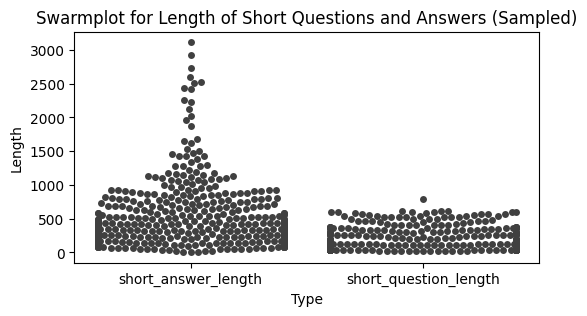

In [ ]:
# Data Visualization of Questions and Answers

import matplotlib.pyplot as plt
import seaborn as sns

length_data = pd.melt(df[['short_question_length', 'short_answer_length']],var_name='Type', value_name='Length')

# Randomly sample 1000 points for the swarmplot if the dataset is large

sampled_data = length_data.sample(n=1000, random_state=42)
plt.figure(figsize=(6,3))
sns.swarmplot(x='Type', y='Length', data=sampled_data, color='.25')
plt.title('Swarmplot for Length of Short Questions and Answers (Sampled)')
plt.show()

# **MODEL TRAINING**

In [14]:
# USING TF-IDF ONLY TO GET ANSWERS (Testing on random question)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Filter the dataset to include only correct answers
filtered_df = df[df['label'] == 1]

# Fit TF-IDF on the filtered lemmatized question tokens
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 3))
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_df['filtered_short_question_tokens'])

# Function to get the best answer based on a user question
def get_best_answer(user_question):
    # Transform the user question using the TF-IDF vectorizer
    question_tfidf = tfidf_vectorizer.transform([user_question])

    # Calculate cosine similarity between the user question and dataset questions
    similarities = cosine_similarity(question_tfidf, tfidf_matrix)

    # Find the index of the most similar question
    best_match_idx = similarities.argmax()

    # Retrieve the corresponding answer from the dataset
    best_answer = filtered_df.iloc[best_match_idx]['short_answer']

    return best_answer

# Test the chatbot with a sample question
user_question = "Symptoms of pregnancy"
print("Chatbot response:", get_best_answer(user_question))


Chatbot response: if a woman has a small prolactinoma there is usually no reason that she cannot conceive and have a normal pregnancy after successful medical therapy the pituitary enlarges and prolactin production increases during normal pregnancy in women without pituitary disorders women with prolactin secreting tumors may experience further pituitary enlargement and must be closely monitored during pregnancy but damage to the pituitary or eye nerves occurs in less than 1 of pregnant women with prolactinomas in women with large tumors the risk of damage to the pituitary or eye nerves is greater if a woman has already completed a successful pregnancy the likelihood of future successful pregnancies is extremely high a woman with a prolactinoma should discuss her plans to conceive with her physician so she can be carefully evaluated prior to pregnancy this evaluation typically includes a magnetic resonance imaging mri scan to assess the size of the tumor and an eye examination with mea

In [15]:
# PREDICTING THE ANSWERS FOR GIVEN QUESTIONS

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import cosine_similarity

filtered_df = df[df['label'] == 1]

# Split the data into training and testing sets
train_df, test_df = train_test_split(filtered_df, test_size=0.2, random_state=42)  # 80% train, 20% test

# Fit TF-IDF on the training set only
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
tfidf_matrix_train = tfidf_vectorizer.fit_transform(train_df['filtered_short_question_tokens'])

def get_best_answer(user_question):
    question_tfidf = tfidf_vectorizer.transform([user_question])
    similarities = cosine_similarity(question_tfidf, tfidf_matrix_train)
    best_match_idx = similarities.argmax()
    best_answer = train_df.iloc[best_match_idx]['short_answer']
    return best_answer

In [16]:
# CALCULATING ACCURACY BASED ON COSINE SIMILARITY
similarity_threshold = 0.5

def evaluate_accuracy_with_cosine_similarity():
    correct_predictions = 0

    for idx, row in test_df.iterrows():
        user_question = row['filtered_short_question_tokens']
        expected_answer = row['short_answer']
        predicted_answer = get_best_answer(user_question)

        # Compute TF-IDF vectors for both the predicted and expected answers
        expected_answer_vec = tfidf_vectorizer.transform([expected_answer])
        predicted_answer_vec = tfidf_vectorizer.transform([predicted_answer])

        # Calculate cosine similarity
        similarity_score = cosine_similarity(expected_answer_vec, predicted_answer_vec).flatten()[0]

        # Check if similarity score meets threshold
        if similarity_score >= similarity_threshold:
            correct_predictions += 1

    # Calculate accuracy
    accuracy = correct_predictions / len(test_df)
    print("Chatbot accuracy based on cosine similarity:", accuracy)

# Run the evaluation
evaluate_accuracy_with_cosine_similarity()

Chatbot accuracy based on cosine similarity: 0.03343949044585987


In [8]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=3605c50178ab951f430f7aa55ba08064c3d33b13385abf0187957a2316f89943
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [17]:
# CALCULATING ROUGE SCORE

from rouge_score import rouge_scorer

# Generate responses for the evaluation set
test_df['generated_answer'] = test_df['short_question'].apply(get_best_answer)

# Initialize the ROUGE evaluator
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Calculate ROUGE scores
rouge_scores = []

# Calculate ROUGE scores and extract fmeasure
for index, row in test_df.iterrows():
    reference = row['short_answer']
    generated = row['generated_answer']

    scores = scorer.score(reference, generated)
    # Extract only the fmeasure (F1-score) for averaging
    rouge_scores.append({metric: scores[metric].fmeasure for metric in scores})

# Create a DataFrame for the ROUGE scores (now with numerical values)
rouge_df = pd.DataFrame(rouge_scores)

# Calculate average ROUGE scores
average_rouge_scores = rouge_df.mean()

# Print the average ROUGE scores
print("Average ROUGE Scores:")
print(average_rouge_scores)

Average ROUGE Scores:
rouge1    0.188896
rouge2    0.029038
rougeL    0.115657
dtype: float64


In [19]:
# USING TF-IDF AND TRANSFORMERS TO SUMMARIZE THE ANSWERS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# from textblob import TextBlob
import pandas as pd
from transformers import pipeline

# Assuming your DataFrame is `df`
# Filter the dataset to include only correct answers
filtered_df = df[df['label'] == 1]

# Fit TF-IDF on the filtered lemmatized question tokens
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_df['filtered_short_question_tokens'])

# Load summarization pipeline with a specified model
summarizer = pipeline("summarization", model="facebook/bart-large-cnn", device=-1)  # Use device=-1 for CPU

# Function to get the best answer based on a user question
def get_best_answer(user_question):
    # Transform the user question using the TF-IDF vectorizer
    question_tfidf = tfidf_vectorizer.transform([user_question])

    # Calculate cosine similarity between the user question and dataset questions
    similarities = cosine_similarity(question_tfidf, tfidf_matrix)

    # Find the index of the most similar question
    best_match_idx = similarities.argmax()

    # Retrieve the corresponding answer from the dataset
    best_answer = filtered_df.iloc[best_match_idx]['short_answer']

    # Summarize the answer if it's lengthy
    if len(best_answer.split()) > 100:  # You can adjust this threshold
        summarized_answer = summarizer(best_answer, max_length=100, min_length=50, do_sample=False)[0]['summary_text']
    else:
        summarized_answer = best_answer

    # Grammar correction
    # corrected_answer = str(TextBlob(summarized_answer).correct())

    return summarized_answer

In [20]:
# Test the chatbot with a sample question
user_question = "Symptoms of pregnancy"
print("Chatbot response:", get_best_answer(user_question))

Chatbot response: If a woman has a small prolactinoma there is usually no reason that she cannot conceive and have a normal pregnancy after successful medical therapy. Pituitary enlarges during normal pregnancy in women without pituitary disorders. Damage to the pituitaries or eye nerves occurs in less than 1 of pregnant women with prolact inomas in women with large tumors.
